In [31]:
import mysql.connector
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import Timestamp
from IPython.display import display
from Functions.connection.connection import *
from Functions.AlertP1.data_cleaning import *
from Functions.AlertP1.features import *
from Functions.analysis.step_analysis import *
from Functions.AlertP1.dummy_features import *
from Functions.Models.decision_tree import *
from Functions.Models.Logistic_regression import *
from Functions.Models.evaluation import *

creds = ["uktuserdaroglu","Vacy4201(Pri","172.20.20.4","hgo",3306]
#Connection to the database
host = creds[2]
user = creds[0]
password = creds[1]
database = creds[3]
port = creds[4]
mydb = mysql.connector.connect(host=host, user=user, database=database, port=port, password=password, auth_plugin='mysql_native_password')
mycursor = mydb.cursor()

#Safecheck to guarantee that the connection worked
mycursor.execute('SHOW TABLES;')
print(f"Tables: {mycursor.fetchall()}")
print(mydb.connection_id) #it'll give connection_id,if got connected

Tables: [('ConsultaUrgencia_doentespedidosconsultaNeurologia2012',), ('consultaneurologia2012',), ('consultaneurologia201216anon_true',)]
1799


In [32]:
alertP = pd.read_sql("""SELECT * FROM consultaneurologia201216anon_true""",mydb)
alertP1=alertP.copy()
alertP1
alertP1.info()
alertP1.head()

/Users/utkuserdaroglu/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10150 entries, 0 to 10149
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_DOENTE            10150 non-null  object
 1   PROCESSO             10150 non-null  object
 2   COD_REFERENCIA       10150 non-null  object
 3   COD_PZ               10150 non-null  object
 4   COD_UNID_SAUDE_PROV  10150 non-null  int64 
 5   UNID_PROV            10150 non-null  object
 6   TIPO_UNID            10150 non-null  object
 7   PROVENIENCIA         10150 non-null  object
 8   COD_CTH_PRIOR        10150 non-null  object
 9   CTH_PRIOR            10150 non-null  object
 10  COD_MOTIVO_RECUSA    10150 non-null  int64 
 11  DES_MOTIVO_RECUSA    10150 non-null  object
 12  COD_ESPECIALIDADE    10150 non-null  int64 
 13  DES_ESPECIALIDADE    10150 non-null  object
 14  agrupadora           10150 non-null  object
 15  OUTRA_ENTIDADE       10150 non-null  int64 
 16  DATA

,ID_DOENTE,PROCESSO,COD_REFERENCIA,COD_PZ,COD_UNID_SAUDE_PROV,UNID_PROV,TIPO_UNID,PROVENIENCIA,COD_CTH_PRIOR,CTH_PRIOR,...,DATA_MARCACAO,DATA_REALIZACAO,OBSERVACOES,Mês_entrada,Ano_entrada,trata data recusa,resume saída,mês_saida,ano_saida,Texto
0,SSHCCB,LVMVDV,LQHSOQLH,GDCADAB,3151575,USF TORRE DA MARINHA,CS/USF,CTH,3,Normal,...,21/05/2015,12/06/2015,,11,2014,21/05/2015,12/06/2015,6,2015,"Utente de 75 anos, refere tremor desde há 5 an..."
1,CSAS,LVMVBD,LOHLTRTS,FZFZSDB,3152471,USF SERVIR SAUDE-CS,CS/USF,CTH,,,...,27/04/2012,02/07/2012,,4,2012,23/04/2012,02/07/2012,7,2012,Avaliação neurologica para avaliação da toma d...
2,ADCFD,LVMMVJ,LQHROQHL,,0,,OUTRA,SAM,,,...,26/09/2014,13/01/2015,,9,2014,26/09/2014,13/01/2015,1,2015,cefaleias
3,SSZDBZ,LVMMLV,LPHQULSU,CSGGHEZ,3151672,USF AMORA SAUDAVEL,CS/USF,CTH,,,...,28/10/2013,03/12/2013,,10,2013,25/10/2013,03/12/2013,12,2013,"Utente do sexo feminino com 30 anos de idade, ..."
4,SEAHEG,LVMNDL,LPHHVHVL,,0,,OUTRA,,,,...,,,Conforme e-mail de 30/11/2015,2,2013,26/02/2013,26/02/2013,2,2013,Sem relatorio clinico


In [33]:
#changing columns with date to a datetime
date_format_alertP1(alertP1)
#change the blank values in proveniencia and priority to unknown
replace_blank(alertP1)
#create a column with the output of a referral and select the refused and accepted ones
alertP1=result(alertP1)#changing columns with date to a datetime
date_format_alertP1(alertP1)
#change the blank values in proveniencia and priority to unknown
replace_blank(alertP1)
#create a column with the output of a referral and select the refused and accepted ones
alertP1=result(alertP1)
class_area(alertP1)
text_length(alertP1)
referral_steps(alertP1)
alertP1=unit(alertP1)

/Users/utkuserdaroglu/Desktop/utkubranch/PBL-HGO/Functions/AlertP1/data_cleaning.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['PROVENIENCIA'][alertP1['PROVENIENCIA']=='']='unknown'
/Users/utkuserdaroglu/Desktop/utkubranch/PBL-HGO/Functions/AlertP1/data_cleaning.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP1['CTH_PRIOR'][alertP1['CTH_PRIOR']=='']='unknown'
/Users/utkuserdaroglu/Desktop/utkubranch/PBL-HGO/Functions/AlertP1/data_cleaning.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydat

In [34]:
alertP2 = alertP1.dropna(subset=['DATA_RETORNO'])


In [35]:
alertP2['Total'] = 1
alertP2=alertP2[["DATA_RETORNO","result","Total"]]
alertP2=alertP2[alertP2["result"]!=""]
alertP2["result"]=alertP2["result"].astype(int)
alertP2["DATA_RETORNO"] =pd.to_datetime(alertP2["DATA_RETORNO"])
alertP2.set_index("DATA_RETORNO", inplace=True)

alertP2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8914 entries, 2015-05-21 to 2016-12-16
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   result  8914 non-null   int64
 1   Total   8914 non-null   int64
dtypes: int64(2)
memory usage: 208.9 KB


/var/folders/h9/v0fvmkcx2fg901hrz6xs3x9c0000gn/T/ipykernel_83376/2182234304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP2['Total'] = 1


In [36]:
#Monthly referral distribution for all sample
monthly_data = alertP2.resample('M').agg({'result': 'sum', 'Total': 'sum'})
monthly_data["Acceptance_Rate"]=monthly_data["result"]/monthly_data["Total"]
monthly_data = monthly_data[monthly_data.index.year < 2017]


monthly_data

,result,Total,Acceptance_Rate
DATA_RETORNO,,,
2012-01-31,58,97,0.597938
2012-02-29,74,117,0.632479
2012-03-31,64,122,0.524590
2012-04-30,57,109,0.522936
2012-05-31,81,156,0.519231
2012-06-30,69,127,0.543307
2012-07-31,68,112,0.607143
2012-08-31,65,97,0.670103
2012-09-30,22,42,0.523810


In [45]:
monthly_data["result"].count()

60

In [38]:
alertP3 = alertP1.dropna(subset=['DATA_RETORNO'])
alertP3['Total'] = 1
alertP3=alertP3[alertP3["text_length"]>1]
alertP3=alertP3[["DATA_RETORNO","result","Total"]]
alertP3=alertP3[alertP3["result"]!=""]
alertP3["result"]=alertP3["result"].astype(int)
alertP3["DATA_RETORNO"] =pd.to_datetime(alertP3["DATA_RETORNO"])
alertP3.set_index("DATA_RETORNO", inplace=True)

/var/folders/h9/v0fvmkcx2fg901hrz6xs3x9c0000gn/T/ipykernel_83376/1276913369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alertP3['Total'] = 1


In [40]:
#Monthly referral distribution for all sample


text = alertP3.resample('M').agg({'result': 'sum', 'Total': 'sum'})
text["Acceptance_Rate"]=text["result"]/text["Total"]
text = text[text.index.year < 2017]
text

,result,Total,Acceptance_Rate
DATA_RETORNO,,,
2012-01-31,13,20,0.650000
2012-02-29,17,23,0.739130
2012-03-31,12,16,0.750000
2012-04-30,14,23,0.608696
2012-05-31,16,26,0.615385
2012-06-30,14,20,0.700000
2012-07-31,8,11,0.727273
2012-08-31,11,19,0.578947
2012-09-30,1,4,0.250000


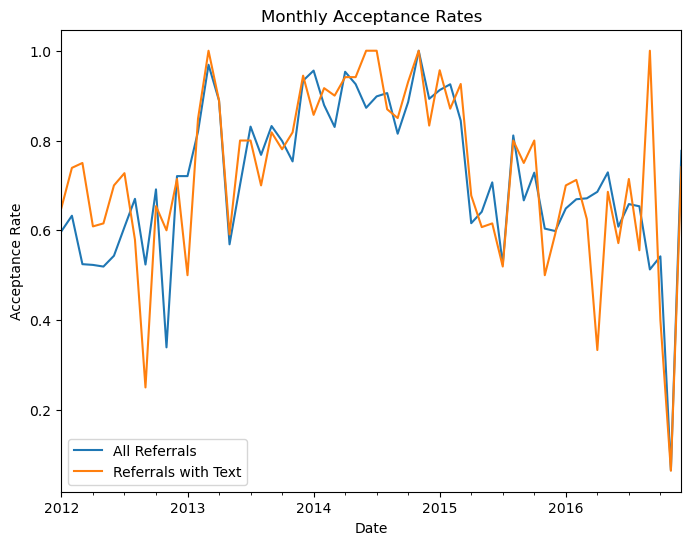

In [43]:
# create a single plot
ax = monthly_data["Acceptance_Rate"].plot(x='Date', y='Value', figsize=(8,6),)

# plot data from the second dataframe onto the same plot
text["Acceptance_Rate"].plot(x='Date', y='Value', ax=ax)

# set title and labels
ax.set_title('Monthly Acceptance Rates')
ax.set_xlabel('Date')
ax.set_ylabel('Acceptance Rate')
ax.legend(['All Referrals', 'Referrals with Text'])

# display the plot
plt.show()